In [2]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt
import sys 
sys.path.append("../core-scripts")
from cheb import cheb

In [34]:
M = 40
D1, ygl = cheb(M)
D2 = np.dot(D1,D1)
D4 = np.dot(D2,D2)
II = np.identity(M)
Re = 5772

LHS = (D4 - 2*D2 + II)/Re - 2j*II - 1j*np.diag(1-ygl*ygl)*(D2-II)
RHS = D2 - II

LHS[0] = np.zeros(M,dtype='D') # u(y=-1) = 0
LHS[0,0] = 1.0
RHS[0] = 0.0

LHS[1] = D1[0] # uy(y=-1) = 0
RHS[1] = 0.0

LHS[M-1] = np.zeros(M,dtype='D') # u(y=1) = 0
LHS[M-1,M-1] = 1.0
RHS[M-1] = 0.0

LHS[M-2] = D1[M-1] # uy(y=1) = 0
RHS[M-2] = 0.0

evals, evecs = eig(LHS,RHS,left=0,right=1)
clean_idx = np.where(evals<10)[0]
evals = evals[clean_idx]
evecs = evecs[clean_idx]
sort_idx = np.argsort(-evals)
evals = evals[sort_idx]
evecs = evecs[sort_idx]

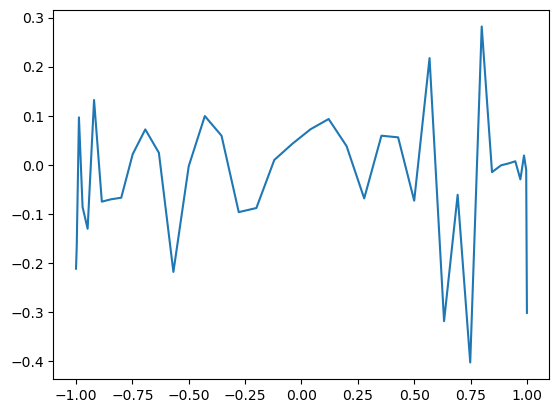

In [35]:
plt.plot(ygl, evecs[sort_idx[2]])

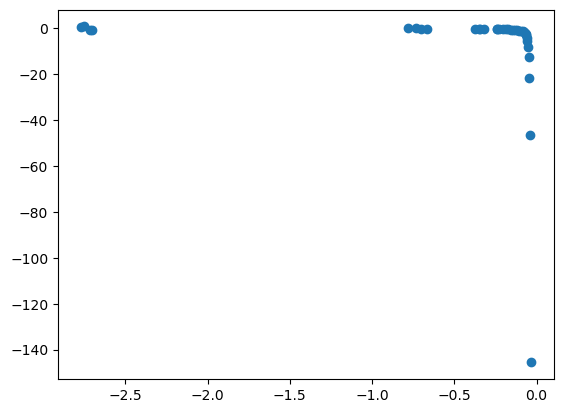

In [36]:
plt.scatter(np.real(evals), np.imag(evals))

In [33]:
np.imag(evals)

array([-1.45588557e+02, -4.64094856e+01, -2.17367526e+01, -1.24607334e+01,
       -8.04343328e+00, -5.60907370e+00, -4.12849273e+00, -3.16260567e+00,
       -2.49849104e+00, -2.02282754e+00, -1.67080234e+00, -1.40303396e+00,
       -1.19470942e+00, -1.02946012e+00, -8.96214599e-01, -7.87245762e-01,
       -6.97019419e-01, -6.21502838e-01, -5.57735727e-01, -5.03464597e-01,
       -4.56221839e-01, -4.16881156e-01, -3.61090739e-01, -3.79761569e-01,
       -3.07197439e-01, -3.03585337e-01, -2.38581584e-01, -2.43374398e-01,
       -1.86857674e-01, -2.14618970e-01, -8.95579011e-02, -1.19112930e-01,
       -9.19996476e-01, -8.63967206e-01,  7.36909977e-01,  6.80615713e-01])